In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\chavs\Downloads\supermarket_sales.csv")

In [4]:
#Estadísticas descriptivas básicas en las columnas unit_price y quantity: Calculo de la media, mediana, moda

unit_price = df['Unit price'].values
quantity = df['Quantity'].values

print("Estadísticas para Unit Price:")
print(f"Media: {np.mean(unit_price):.2f}")
print(f"Mediana: {np.median(unit_price):.2f}")
print(f"Moda: {pd.Series(unit_price).mode().values[0]:.2f}")
print(f"Desviación estándar: {np.std(unit_price):.2f}")
print(f"Mínimo: {np.min(unit_price):.2f}")
print(f"Máximo: {np.max(unit_price):.2f}")
print(f"Rango: {np.ptp(unit_price):.2f}")

print("\nEstadísticas para Quantity:")
print(f"Media: {np.mean(quantity):.2f}")
print(f"Mediana: {np.median(quantity):.2f}")
print(f"Moda: {pd.Series(quantity).mode().values[0]:.2f}")
print(f"Desviación estándar: {np.std(quantity):.2f}")
print(f"Mínimo: {np.min(quantity):.0f}")
print(f"Máximo: {np.max(quantity):.0f}")
print(f"Rango: {np.ptp(quantity):.0f}")

Estadísticas para Unit Price:
Media: 55.67
Mediana: 55.23
Moda: 83.77
Desviación estándar: 26.48
Mínimo: 10.08
Máximo: 99.96
Rango: 89.88

Estadísticas para Quantity:
Media: 5.51
Mediana: 5.00
Moda: 10.00
Desviación estándar: 2.92
Mínimo: 1
Máximo: 10
Rango: 9


In [5]:
#Ticket promedio:

#Ciudad
ticket_ciudad = df.groupby('City')['Total'].mean()
print("\nTicket promedio por ciudad:")
print(ticket_ciudad)

#Product line y ciudad
ticket_producto_ciudad = df.groupby(['Product line', 'City'])['Total'].mean()
print("\nTicket promedio por línea de producto y ciudad:")
print(ticket_producto_ciudad)

#Género
ticket_genero = df.groupby('Gender')['Total'].mean()
print("\nTicket promedio por género:")
print(ticket_genero)

#Género y product line
ticket_genero_producto = df.groupby(['Gender', 'Product line'])['Total'].mean()
print("\nTicket promedio por género y línea de producto:")
print(ticket_genero_producto)


Ticket promedio por ciudad:
City
Mandalay     319.872506
Naypyitaw    337.099715
Yangon       312.354031
Name: Total, dtype: float64

Ticket promedio por línea de producto y ciudad:
Product line            City     
Electronic accessories  Mandalay     310.026245
                        Naypyitaw    344.890445
                        Yangon       305.285225
Fashion accessories     Mandalay     264.730911
                        Naypyitaw    331.693385
                        Yangon       320.245265
Food and beverages      Mandalay     304.297770
                        Naypyitaw    360.103864
                        Yangon       295.915526
Health and beauty       Mandalay     376.993585
                        Naypyitaw    319.525500
                        Yangon       268.037298
Home and lifestyle      Mandalay     350.983290
                        Naypyitaw    308.790067
                        Yangon       344.879931
Sports and travel       Mandalay     322.390306
               

In [6]:
#Ranking y porcentajes
def rank_and_percentage(data, group_col, value_col='Total'):
    grouped = data.groupby(group_col)[value_col].sum()
    ranked = grouped.rank(ascending=False, method='min')
    percentage = (grouped / grouped.sum()) * 100
    
    result = pd.DataFrame({
        'Total Ventas': grouped,
        'Ranking': ranked,
        'Porcentaje': percentage
    }).sort_values('Ranking')
    
    return result

#Top venta por ciudad
ventas_ciudad = rank_and_percentage(df, 'City')
print("\nRanking de ventas por ciudad:")
print(ventas_ciudad.head(5))

#Top ventas por tipo de cliente
ventas_member = rank_and_percentage(df, 'Customer type')
print("\nRanking de ventas por tipo de cliente:")
print(ventas_member.head(5))

#Ventas por tipo de pago
ventas_payment = rank_and_percentage(df, 'Payment')
print("\nRanking de ventas por método de pago:")
print(ventas_payment.head(5))


Ranking de ventas por ciudad:
           Total Ventas  Ranking  Porcentaje
City                                        
Naypyitaw   110568.7065      1.0   34.235322
Yangon      106200.3705      2.0   32.882757
Mandalay    106197.6720      3.0   32.881921

Ranking de ventas por tipo de cliente:
               Total Ventas  Ranking  Porcentaje
Customer type                                   
Member           164223.444      1.0   50.848406
Normal           158743.305      2.0   49.151594

Ranking de ventas por método de pago:
             Total Ventas  Ranking  Porcentaje
Payment                                       
Cash           112206.570      1.0   34.742453
Ewallet        109993.107      2.0   34.057099
Credit card    100767.072      3.0   31.200448


In [7]:
#Correlación
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
hours = df['Hour'].values
total = df['Total'].values

corr_hora_total = np.corrcoef(hours, total)[0, 1]
print(f"\nCorrelación entre hora del día y monto total: {corr_hora_total:.4f}")

unit_price = df['Unit price'].values
rating = df['Rating'].values
corr_precio_rating = np.corrcoef(unit_price, rating)[0, 1]
print(f"Correlación entre precio unitario y rating: {corr_precio_rating:.4f}")


Correlación entre hora del día y monto total: -0.0028
Correlación entre precio unitario y rating: -0.0088


C:\Users\chavs\AppData\Local\Temp\ipykernel_13944\3055354345.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


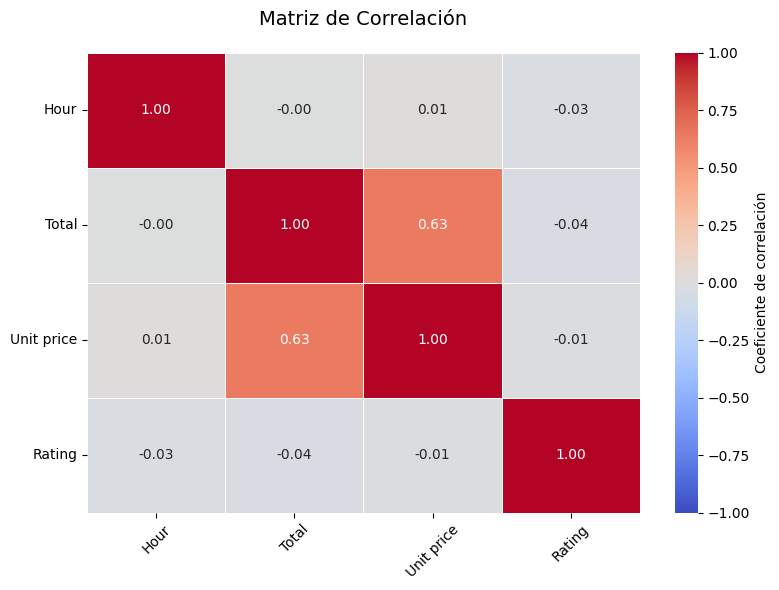

In [8]:
#Heatmap de correlación

import seaborn as sns
import matplotlib.pyplot as plt

corr_data = df[['Hour', 'Total', 'Unit price', 'Rating']]

corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"label": "Coeficiente de correlación"})

plt.title('Matriz de Correlación', pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

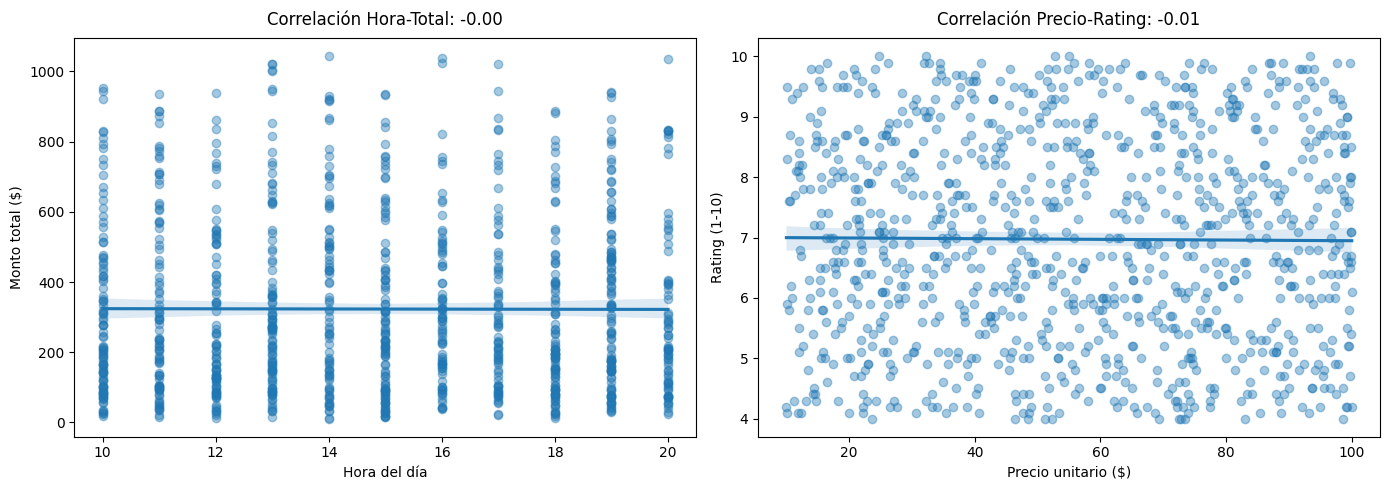

In [9]:
#Gráfico de dispersión 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.regplot(x='Hour', y='Total', data=df, ax=ax1, scatter_kws={'alpha':0.4})
ax1.set_title(f'Correlación Hora-Total: {corr_hora_total:.2f}', pad=10)
ax1.set_xlabel('Hora del día')
ax1.set_ylabel('Monto total ($)')

sns.regplot(x='Unit price', y='Rating', data=df, ax=ax2, scatter_kws={'alpha':0.4})
ax2.set_title(f'Correlación Precio-Rating: {corr_precio_rating:.2f}', pad=10)
ax2.set_xlabel('Precio unitario ($)')
ax2.set_ylabel('Rating (1-10)')

plt.tight_layout()
plt.show()

Interpretación de resultados:
1. Estadísticas descriptivas: Se calcularon medidas de tendencia central y dispersión para precios y cantidades.
2. Ticket promedio: Se analizó en diferentes segmentaciones (ciudad, producto, género).
3. Rankings: Se identificaron las categorías con mayores ventas y su porcentaje de contribución.
4. Correlaciones:
   - Hora vs Total: -0.0028 (cercano a 0 indica poca relación lineal)
   - Precio vs Rating: -0.0088 (valor cercano a 0 sugiere poca relación entre precio y satisfacción)